<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [136]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import warnings
warnings.filterwarnings('ignore')

In [137]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [138]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [139]:
query_3_1 = f'''
SELECT             /*выбор*/
    COUNT(*)       /*подсчёт всех строк*/
FROM vacancies     /*из таблицы vacancies*/
'''

In [140]:
df3_1 = pd.read_sql_query(query_3_1, connection)
print('Количество вакансий в базе:', df3_1['count'][0])

Количество вакансий в базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [141]:
query_3_2 = f'''
SELECT              /*выбор*/
    COUNT(*)        /*подсчёт всех строк*/
FROM employers      /*из таблицы employers*/
'''

In [142]:
df3_2 = pd.read_sql_query(query_3_2, connection)
print('Количество работодателей в базе:', df3_2['count'][0])

Количество работодателей в базе: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [143]:
query_3_3 = f'''
SELECT              /*выбор*/
    COUNT(*)        /*подсчёт всех строк*/
FROM areas          /*из таблицы areas*/
'''

In [144]:
df3_3 = pd.read_sql_query(query_3_3, connection)
print('Количество регионов в базе:', df3_3['count'][0])

Количество регионов в базе: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [145]:
query_3_4 = f'''
SELECT              /*выбор*/
    COUNT(*)        /*подсчёт всех строк*/
FROM industries     /*из таблицы industries*/
'''

In [146]:
df3_4 = pd.read_sql_query(query_3_4, connection)
print('Количество сфер деятельности в базе:', df3_4['count'][0])

Количество сфер деятельности в базе: 294


***

# Выводы по предварительному анализу данных.
* Всего вакансий в базе - 49197, при этом работодателей - 23501 (в среднем на одного работодателя приходится 2 вакансии). Но здесь мы понимаем, что вакансии мы считаем актуальные на момент выгрузки базы, а работодатели - справочная информация, собранная за определенное время, и поэтому эта информация актуальна не вся. В принципе, то же самое можно сказать и о количестве регионов (1362) и о количестве сфер деятельности (294). 

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [147]:
query_4_1 = f'''
SELECT                                          /*выбираем*/
    a.name area,                                /*зачения столбца name таблицы a, называем его area*/
    COUNT(v.id) cnt                             /*подсчёт строк по столбцу id таблицы v, называем cnt*/
FROM areas a                                    /*из таблицы areas с алиасом a*/
    LEFT JOIN vacancies v ON v.area_id = a.id   /*оператор соединения таблиц; таблица vacancies с алиасом v; условие: area_id таблицы v равен id таблицы a*/
GROUP BY 1                                      /*группировка по 1-му столбцу*/
ORDER BY 2 DESC                                 /*сортировка по 2-му столбцу в порядке убывания*/
'''

In [148]:
df4_1 = pd.read_sql_query(query_4_1, connection)
display(df4_1)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


In [149]:
# сделаем дополнительный запрос для построения наглядной диаграммы распределения вакансий по регионам,
# где будем рассматривоть города с количеством вакансий не меньше 1000, а остальные объеденим в группу "Другие"

query_4_1_1 = f'''
SELECT                                          
    a.name area,                                /*столбец name таблицы a с названием area*/
    COUNT(v.id) cnt                             /*подсчёт строк по столбцу id таблицы v с названием cnt*/
FROM 
    areas a                                     /*из таблицы areas с алиасом a*/
    LEFT JOIN vacancies v ON v.area_id = a.id   /*оператор соединения таблиц; таблица vacancies с алиасом v; условие: area_id таблицы v равен id таблицы a*/
GROUP BY 1                                      /*группировка по 1-му столбцу*/
HAVING COUNT(v.id) >= 1000                      /*при условии, что кол-во вакансий в регионе не менее 1000*/
                     
UNION ALL                                       /*оператор присоединения запросов*/

SELECT                                                                         
    'Другие',                                   /*создаем столбец 'Другие'*/
    SUM(c)                                      /*суммируем значения столбца c*/
FROM (                                          
    SELECT                                      /*из подзапроса*/
        COUNT(id) c                             /*подсчёт строк по столбцу id с названием c*/
    FROM vacancies                              /*из таблицы vacancies*/
    GROUP BY area_id                            /*группировка по столбцу area_id*/
    HAVING COUNT(id) < 1000                     /*при условии, что кол-во вакансий в регионе меньше 1000*/
    ) others                                    /*называем подзапрос*/
ORDER BY cnt DESC                               /*сортировка по столбцу cnt в порядке убывания*/
'''


In [150]:
df4_1_1 = pd.read_sql_query(query_4_1_1, connection)

# построим диаграмму распределения вакансий по регионам

fig1 = go.Figure(go.Pie(            # задаем круговую диаграмму
    values = df4_1_1['cnt'],        # где сектора это количество вакансий
    labels = df4_1_1['area']        # название регинов по этим секторам
))

fig1.update_layout(
    title = {
        'text': 'Соотношение вакансий по регионам',
        'y': 0.9,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    titlefont = {'size': 20, 'color': 'green'}
    )
fig1.show()

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [151]:
query_4_2 = f'''
SELECT 
    COUNT(*)                                            /*подсчёт всех строк*/
FROM 
    vacancies                                           /*из таблицы vacancies*/ 
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL  /*где хотя бы одно из двух полей с зарплатой заполнено*/
'''

In [152]:
df4_2 = pd.read_sql_query(query_4_2, connection)
print('Количество вакансий с заполненным хотя бы одним полем с зарплатой:', df4_2['count'][0])

Количество вакансий с заполненным хотя бы одним полем с зарплатой: 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [153]:
query_4_3 = f'''
SELECT 
    ROUND(AVG(salary_from)) sf,    /*находим среднее значение для столбца salary_from и округляем его*/
    ROUND(AVG(salary_to)) st       /*находим среднее значение для столбца salary_to и округляем его*/
FROM 
    vacancies                      /*из таблицы vacancies*/
'''

In [154]:
df4_3 = pd.read_sql_query(query_4_3, connection)
print('Среднее значение для нижней границы зарплатной вилки:', df4_3['sf'][0])
print('Среднее значение для верхней границы зарплатной вилки:', df4_3['st'][0])

Среднее значение для нижней границы зарплатной вилки: 71065.0
Среднее значение для верхней границы зарплатной вилки: 110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [155]:
query_4_4 = f'''
SELECT 
    schedule,       /*столбец schedule*/
    employment,     /*столбец employment*/
    COUNT(*)        /*подсчёт всех строк*/
FROM 
    vacancies       /*из таблицы vacancies*/
GROUP BY 1, 2       /*группировка по столбцу schedule и затем employment*/
ORDER BY 3 DESC     /*сортировка по 3-му столбцу в порядке убывания*/
'''

In [156]:
df4_4 = pd.read_sql_query(query_4_4, connection)
display(df4_4)



,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


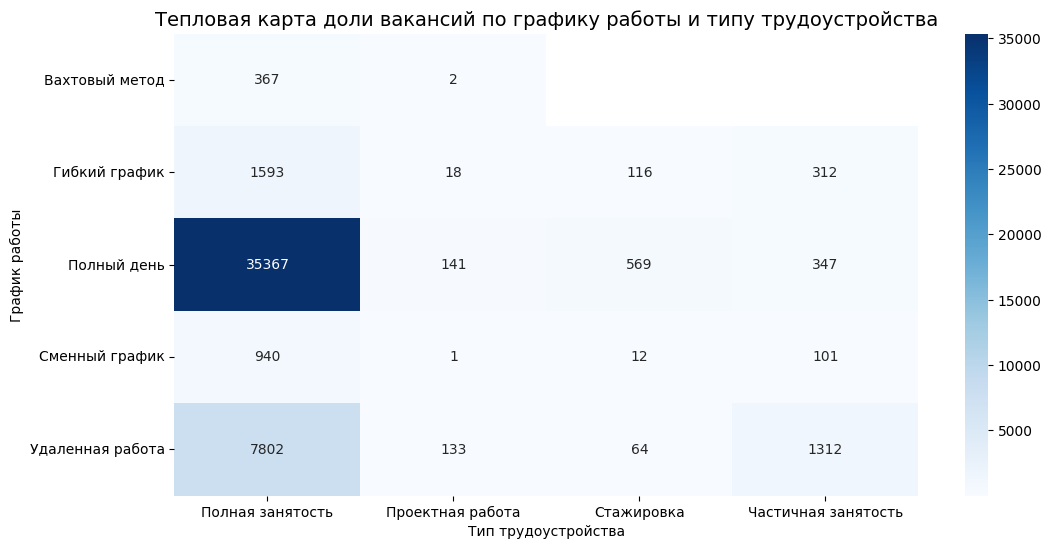

In [157]:
# построим тепловую карту вакансий в зависимости от графика работы и типа трудоустройства
heat_map = df4_4.pivot_table(
    values = 'count',
    index = 'schedule',
    columns = 'employment'
)
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(heat_map, cmap='Blues', annot=True, fmt='g')
heatmap.set_title('Тепловая карта доли вакансий по графику работы и типу трудоустройства', fontsize=14);
heatmap.set_xlabel("Тип трудоустройства")
heatmap.set_ylabel("График работы");

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [158]:
query_4_5 = f'''
SELECT 
    experience, /*столбец experience*/
    COUNT(*)    /*подсчёт всех строк*/
FROM 
    vacancies   /*из таблицы vacancies*/
GROUP BY 1      /*группировка по столбцу experience*/
ORDER BY 2      /*сортировка по 2-му столбцу в порядке возрастания*/
'''

In [159]:
df4_5 = pd.read_sql_query(query_4_5, connection)
display(df4_5)

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [160]:
# для наглядности построим круговую диаграмму соотношения вакансий исходя из опыта работы

fig1 = go.Figure(go.Pie(
    values = df4_5['count'],
    labels = df4_5['experience']
))

fig1.update_layout(
    title = {
        'text': 'Соотношение вакансий по опыту работы',
        'y': 0.9,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    titlefont = {'size': 20, 'color': 'green'}
    )
fig1.show()

***

# Выводы по детальному анализу вакансий.
1. 12 первых строчек по количеству вакансий, во главе с Москвой (10,8% от всех вакансий), занимают крупнейшие города-миллионники, как России, так и ближнего зарубежья (Минск, Алматы). Вакансии, предлагаемые в этих городах составляют почти половину (48%) от всех вакансий на hh.ru.
2. Чуть больше половины (51%) из всех вакансий не имеют информации о заработной плате, что не дает нам полной достоверной информации о зарплатных вилках в вакансиях.
3. В оставшихся 49% вакансий среднее значение нижней границы зарплатной вилки составляет 71065 руб., верхней - 110537 руб.
4. В подавляющем числе вакансий - 35367 (72% от всех вакансий) работодатели ищут сотрудников на полный рабочий день при полной занятости. Можно отметить также вакансии с удаленной работой при полной занятости, здесь таких вакансий - 7802 (16% от всех вакансий). Остальные сочетания занятости и графика имеют значительно меньше вакансий (12% оставшихся сочетаний в вакансиях)
5. Более половины всех вакансий (53,2%) предъявляют к будущим сотрудникам довольно скромный опыт работы - от 1 года до 3 лет. Более опытных сотрудников (от 3 до 6 лет) ищут в 29,5% вакансий. Самых матерых (от 6 лет) ищут всего 2,72%, что заметно ниже даже тех, кто без опыта (14,6% вакансий). Я думаю, это свзано со спецификой и ценностью предлагаемых вакансий для опытных специалистов, а соответственно с редкостью таких должностей. Да и в большинстве случаев такие специалисты учатся, приобретают опыт и продолжают работать, двигаясь по карьерной лестнице внутри предприятия, и соответственно, здесь более востребованы новые молодые не сильно амбициозные специалисты с небольшим опытом или даже без него. 


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [161]:
query_5_1 = f'''
(SELECT 
    e.name,                                     /*столбец name таблицы e*/
    COUNT(*)                                    /*подсчёт всех строк*/
FROM    
    employers e                                 /*из таблицы employers с алиасом e*/                        
    JOIN vacancies v ON v.employer_id = e.id    /*оператор соединения таблиц; таблица vacancies с алиасом v; условие: employer_id таблицы v равен id таблицы e*/
GROUP BY 1                                      /*группировка по 1-му столбцу*/                 
ORDER BY 2 DESC                                 /*сортировка по 2-му столбцу в порядке убывания*/
LIMIT 1)                                        /*ограничить вывод одним значением */

UNION ALL                                       /*оператор соединения запросов*/

(SELECT 
    e.name,                                     /*столбец name таблицы e*/
    COUNT(*)                                    /*подсчёт всех строк*/
FROM    
    employers e                                 /*из таблицы employers с алиасом e*/                        
    JOIN vacancies v ON v.employer_id = e.id    /*оператор соединения таблиц; таблица vacancies с алиасом v; условие: employer_id таблицы v равен id таблицы e*/
GROUP BY 1                                      /*группировка по 1-му столбцу*/                 
ORDER BY 2 DESC                                 /*сортировка по 2-му столбцу в порядке убывания*/
OFFSET 4 LIMIT 1)                               /*исключить первые 4 строки и вывести одну следующую за ними*/
'''

In [162]:
df5_1 = pd.read_sql_query(query_5_1, connection)
print('Работодатели, находящиеся на первом и пятом месте по количеству вакансий:', df5_1['name'][0], "-", df5_1['name'][1])

Работодатели, находящиеся на первом и пятом месте по количеству вакансий: Яндекс - Газпром нефть


In [163]:
#сделаем дополнительный запрос и посмотрим кто входит в ТОП-5 компаний по количеству вакансий
query_5_1_1 = f'''
SELECT 
    e.name,                                     /*столбец name таблицы e*/
    COUNT(*)                                    /*подсчёт всех строк*/
FROM    
    employers e                                 /*из таблицы employers с алиасом e*/                        
    JOIN vacancies v ON v.employer_id = e.id    /*оператор соединения таблиц; таблица vacancies с алиасом v; условие: employer_id таблицы v равен id таблицы e*/
GROUP BY 1                                      /*группировка по 1-му столбцу*/                 
ORDER BY 2 DESC                                 /*сортировка по 2-му столбцу в порядке убывания*/
LIMIT 5                                        /*ограничить вывод 5 значениями */
'''

In [164]:
df5_1_1 = pd.read_sql_query(query_5_1_1, connection)
display(df5_1_1)

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [165]:
query_5_2 = f'''
SELECT
    a.name Регион,                              /*столбец name таблицы а с алиасом Регион*/
    COUNT(DISTINCT e.id) Работодатели,          /*подсчёт строк с уникальным id таблицы e, алиас Работодатели*/
    COUNT(DISTINCT v.id) Вакансии               /*подсчёт строк с уникальным id таблицы v, алиас Вакансии*/
FROM    
    areas a                                     /*из таблицы areas с алиасом a*/
    LEFT JOIN vacancies v ON v.area_id = a.id   /*оператор соединения таблиц; таблица vacancies с алиасом v; условие: area_id таблицы v равен id таблицы a*/
    LEFT JOIN employers e ON e.area = a.id      /*оператор соединения таблиц; таблица employers с алиасом e; условие: area_id таблицы e равен id таблицы a*/
WHERE v.id IS NULL                              /*при условии, что id из таблицы v отсутствует*/                          
GROUP BY 1                                      /*группировка по 1-му столбцу*/ 
ORDER BY 2 DESC                                 /*сортировка по 2-му столбцу в порядке убывания*/
'''

In [166]:
df5_2 = pd.read_sql_query(query_5_2, connection)
display(df5_2)

,Регион,Работодатели,Вакансии
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [167]:
query_5_3 = f'''
SELECT
    e.name Компания,                                /*столбец name таблицы e с алиасом Компания*/
    COUNT(DISTINCT v.area_id) "Кол-во регионов"     /*подсчёт строк с уникальным area_id таблицы v, алиас Кол-во регионов*/
FROM    
    vacancies v                                     /*из таблицы vacancies с алиасом v*/
    JOIN employers e ON e.id = v.employer_id        /*оператор соединения таблиц; таблица employers с алиасом e; условие: employer_id таблицы v равен id таблицы e*/
GROUP BY 1                                          /*группировка по 1-му столбцу*/
ORDER BY 2 DESC                                     /*сортировка по 2-му столбцу в порядке убывания*/                             
'''

In [168]:
df5_3 = pd.read_sql_query(query_5_3, connection)
display(df5_3)

,Компания,Кол-во регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [169]:
query_5_4 = f'''
SELECT
    COUNT(*)                                                        /*подсчёт всех строк*/
FROM    
    employers e                                                     /*из таблицы employers с алиасом e*/
    LEFT JOIN employers_industries ei ON ei.employer_id = e.id      /*оператор соединения таблиц; таблица employers_industries с алиасом ei; условие: employer_id таблицы ei равен id таблицы e*/   
WHERE ei.industry_id IS NULL                                        /*при условии, что industry_id из таблицы ei отсутствует*/
'''

In [170]:
df5_4 = pd.read_sql_query(query_5_4, connection)
print('Работодатели, у которых не указана сфера деятельности:', df5_4['count'][0])

Работодатели, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [171]:
query_5_5 = f'''
SELECT
    e.name                                                      /*выбираем значение из столбца name таблицы e*/
FROM    
    employers e                                                 /*из таблицы employers с алиасом e*/
    LEFT JOIN employers_industries ei ON ei.employer_id = e.id  /*оператор соединения таблиц; таблица employers_industries с алиасом ei; условие: employer_id таблицы ei равен id таблицы e*/   
GROUP BY 1                                                      /*группировка по 1-му столбцу*/
HAVING COUNT(ei.industry_id) = 4                                /*при условии, что кол-во значений industry_id из таблицы ei равно 4*/
ORDER BY 1                                                      /*сортировка по 1-му столбцу в порядке возрастания*/
OFFSET 2 LIMIT 1                                                /*исключить первые две строки и вывести одну следующую за ними*/
'''

In [172]:
df5_5 = pd.read_sql_query(query_5_5, connection)
print('Компания, находящаяся на третьем месте в алфавитном списке компаний, у которых указано четыре сферы деятельности:', df5_5['name'][0])

Компания, находящаяся на третьем месте в алфавитном списке компаний, у которых указано четыре сферы деятельности: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [173]:
query_5_6 = f'''
SELECT
    COUNT(ei.employer_id)                               /*подсчёт значений employer_id таблицы ei*/                 
FROM    
    employers_industries ei                             /*из таблицы employers_industries с алиасом ei*/
    JOIN industries i ON ei.industry_id = i.id          /*оператор соединения таблиц; таблица industries с алиасом i; условие: industry_id таблицы ei равен id таблицы i*/ 
WHERE i.name = 'Разработка программного обеспечения'    /*при условии, что значение name из таблицы i равно 'Разработка программного обеспечения'*/
'''

In [174]:
df5_6 = pd.read_sql_query(query_5_6, connection)
print('Количество работодателей, у которых в качестве сферы деятельности указана Разработка программного обеспечения:', df5_6['count'][0])

Количество работодателей, у которых в качестве сферы деятельности указана Разработка программного обеспечения: 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [175]:
# впеременной сохраняем ссылку на Список городов-милионников
url = "https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
# считаем список из 2 колонки 'Город', заменим "Воронеж[a]" на Воронеж" и поместим список в кортеж
cities_1e6 = tuple(pd.read_html(url)[1].Город.replace("Воронеж[a]","Воронеж"))

In [176]:
query_5_7 = f'''
SELECT
    a.name "Города-миллионники",                /*столбец name таблицы а*/                    
    COUNT(v.id) "Вакансии компании Яндекс"      /*подсчёт значений id таблицы v*/
FROM vacancies v                                /*из таблицы vacancies с алиасом v*/
    JOIN areas a ON a.id = v.area_id            /*оператор соединения таблиц; таблица areas с алиасом а; условие: id таблицы a равен area_id таблицы v*/ 
    JOIN employers e ON e.id = v.employer_id    /*оператор соединения таблиц; таблица employers с алиасом e; условие: id таблицы a равен employer_id таблицы v*/ 
WHERE a.name in {cities_1e6}                    /*при условии, что значение name из таблицы a есть в кортеже cities_1e6*/
    AND e.name = 'Яндекс'                       /*и значение name таблицы е равно "Яндекс"*/
GROUP BY 1                                      /*группировка по 1 столбцу*/

UNION ALL                                       /*оператор соединения запросов*/

SELECT
    'Total',                                    /*создаем столбец 'Total'*/
    COUNT(*)                                    /*подсчёт всех строк*/
FROM vacancies v                                /*из таблицы vacancies с алиасом v*/
    JOIN areas a ON a.id = v.area_id            /*оператор соединения таблиц; таблица areas с алиасом а; условие: id таблицы a равен area_id таблицы v*/ 
    JOIN employers e ON e.id = v.employer_id    /*оператор соединения таблиц; таблица employers с алиасом e; условие: id таблицы a равен employer_id таблицы v*/
WHERE a.name in {cities_1e6}                    /*при условии, что значение name из таблицы a есть в кортеже cities_1e6*/
    AND e.name = 'Яндекс'                       /*и значение name таблицы е равно "Яндекс"*/

ORDER BY 2                                      /*сортировка по 2 столбцу в порядке возрастания*/
'''

In [177]:
df5_7 = pd.read_sql_query(query_5_7, connection)
display(df5_7)

,Города-миллионники,Вакансии компании Яндекс
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


In [178]:
# сделаем дополнительный запрос для построения диаграммы распределения вакансий компании "Яндекс" по регионам,
# где будем рассматривоть города-миллионники, объединенные в группу "Города-миллионники"
# и остальные регионы, объединенные в группу "Другие"

query_5_7_1 = f'''
SELECT
    'Другие' Регионы,                        
    COUNT(v.id) "Кол-во"
FROM vacancies v
    JOIN areas a ON a.id = v.area_id
    JOIN employers e ON e.id = v.employer_id
WHERE a.name NOT IN {cities_1e6} 
    AND e.name = 'Яндекс'
GROUP BY 1

UNION ALL

SELECT
    'Города-миллионники',
    COUNT(*)
FROM
    vacancies v
    JOIN areas a ON a.id = v.area_id
    JOIN employers e ON e.id = v.employer_id
WHERE a.name IN {cities_1e6} 
    AND e.name = 'Яндекс'

ORDER BY 2
'''

In [179]:
df5_7_1 = pd.read_sql_query(query_5_7_1, connection)

fig = go.Figure(go.Pie(
    values = df5_7_1['Кол-во'],
    labels = df5_7_1['Регионы']
))

fig.update_layout(
    title = {
        'text': 'Соотношение вакансий компании "Яндекс" по регионам',
        'y': 0.9,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    titlefont = {'size': 20, 'color': 'green'}
    )
fig.show()

***

# Выводы по анализу работодателей.
1. Первую строчку по количеству вакансий, занимает компания "Яндекс". Замыкает пятерку лидеров по количеству вакансий компания "Газпром нефть" с вакансиями в 6 раз меньше, чем у лидера. Работодатели, находящиеся между этими монстрами рынка труда и занявшие со 2-го по 4-места: "Ростелеком", "Тинькофф", "СБЕР".
2. Анализ показал, что некоторые работодатели, указывая регион регистрации "Россия" в справочнике работодателей, скорее всего, уже непосредственно в вакансиях указывают более конкретные регионы, так как в базе существует 410 работодателей с таким регионом регистрации при отсутствии размещенных в нем вакансий. 
3. По количеству регионов, в которых размещены вакансии различных компаний, "Яндекс" занимает первую строчку со 181 регионом.
4. Странно, но факт, что шестая часть работодателей не указывает у себя в справочнике ни одну из сфер деятельности. 
5. Компания "2ГИС" указала у себя в профиле 4 различные сферы деятельности, как и ещё 1137 компаний.
6. 3553 работодателей указали у себя в профиле сферу деятельности "Разработка программного обеспечения", что составляет 15% из всех работодателей.
7. 485 вакансий компании "Яндекс" представлены в 16 городах-миллионниках нашей страны, что составляет 25,1% из всех вакансий компании "Яндекс"

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [180]:
query_6_1 = f'''
SELECT
    COUNT(*)
FROM vacancies
WHERE name ILIKE '%data%' OR name ILIKE '%данн%'
'''

In [181]:
df6_1 = pd.read_sql_query(query_6_1, connection)
print('Вакансий, имеющих отношение к данным:', df6_1['count'][0])

Вакансий, имеющих отношение к данным: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [182]:
query_6_2 = f'''
SELECT COUNT(*)
FROM vacancies
WHERE 
    (name ILIKE '%data scientist%' 
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%'
    )
    AND
    (name ILIKE '%junior%'
    OR experience = 'Нет опыта'
    OR employment = 'Стажировка'
    )    
'''

In [183]:
df6_2 = pd.read_sql_query(query_6_2, connection)
print('Подходящие вакансии для начинающего дата-сайентиста:', df6_2['count'][0])

Подходящие вакансии для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [184]:
query_6_3 = f'''
SELECT COUNT(*)
FROM vacancies
WHERE 
    (name ILIKE '%data scientist%' 
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%'
    )
    AND
    (key_skills LIKE '%SQL%'
    OR key_skills ILIKE '%postgres%'
    )
'''

In [185]:
df6_3 = pd.read_sql_query(query_6_3, connection)
print('Вакансии для DS, в которых в качестве ключевого навыка указан SQL или postgres:', df6_3['count'][0])

Вакансии для DS, в которых в качестве ключевого навыка указан SQL или postgres: 201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [186]:
query_6_4 = f'''
SELECT COUNT(*)
FROM vacancies
WHERE 
    (name ILIKE '%data scientist%' 
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%'
    )
    AND
    key_skills ILIKE '%Python%'
'''

In [187]:
df6_4 = pd.read_sql_query(query_6_4, connection)
print('Количество вакансий, в которых в качестве ключевого навыка указан Python:', df6_4['count'][0])

Количество вакансий, в которых в качестве ключевого навыка указан Python: 351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [188]:
query_6_5 = f'''
SELECT 
    ROUND(AVG(LENGTH(key_skills) 
    - LENGTH(REPLACE(key_skills,CHR(9),'')) + 1), 2) 
FROM vacancies
WHERE 
    (name ILIKE '%data scientist%' 
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%'
    )
    AND key_skills IS NOT NULL
'''

In [189]:
df6_5 = pd.read_sql_query(query_6_5, connection)
print('Ключевых навыков в среднем указывают в вакансиях для DS:', df6_5['round'][0])

Ключевых навыков в среднем указывают в вакансиях для DS: 6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [190]:
query_6_6 = f'''
SELECT  experience Опыт,
        ROUND(AVG(COALESCE((salary_from + salary_to)/2, salary_from, salary_to))) "Средняя зарплата"
FROM vacancies
WHERE 
    (name ILIKE '%data scientist%' 
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%'
    )
GROUP BY 1
'''

In [191]:
df6_6 = pd.read_sql_query(query_6_6, connection)
print(df6_6)

                 Опыт  Средняя зарплата
0         Более 6 лет               NaN
1           Нет опыта           74643.0
2  От 1 года до 3 лет          139675.0
3       От 3 до 6 лет          243115.0


***

# Выводы по предметному анализу.
1. Мы выяснили, что 1771 вакансия на сайте hh.ru имеют отношение к работе с данными.
2. Также удалось определить, что 51 вакансия подходит для начинающих дата-сайентистов.
3. Для тех дата-сайентистов, кто ищет вакансии с ключевыми навыками: SQL или postgres, на hh.ru представлена 201 вакансия.
4. Работодатели, требующие в качестве ключевого навыка знание Python для дата-сайентистов, выставили 351 вакансию.
5. В вакансиях для дата-сайентистов, в среднем работодатели указывают 6,41 ключевых навыков.
6. Зарплаты для дата-сайентистов довольно высоки: в среднем работодатели готовы платить начинающим дата-сайентистам (без опыта работы) - 74643 руб., более опытным (от 1 года до 3 лет) почти в 2 раза больше - 139675 руб., еще более опытным (от 3 до 6 лет) - 243115 руб. Ну а матерым дата-сайентистам (опыт работы от 6 лет) - видимо зарплата по договоренности, так как ее не указывают работодатели у себя в вакансиях.


# 7. Дополнительные исследования


1. Запрос, позволяющий выяснить среднюю зарплату дата-сайентистов, где она указана в вакансиях, и количество таких вакансий по регионам.

In [209]:
query_7_1 = f'''
SELECT a.name,
    COUNT(*),
    ROUND(AVG(COALESCE((salary_from + salary_to)/2, salary_from, salary_to))) "Средняя зарплата"
FROM vacancies v
    JOIN areas a ON v.area_id = a.id
WHERE 
    (v.name ILIKE '%data scientist%' 
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%'
    )
    AND 
    (salary_from IS NOT NULL
    OR salary_to IS NOT NULL)
GROUP BY 1

UNION ALL

SELECT 'Total',
    COUNT(*),
    ROUND(AVG(COALESCE((salary_from + salary_to)/2, salary_from, salary_to))) "Средняя зарплата"
FROM vacancies v
    JOIN areas a ON v.area_id = a.id
WHERE 
    (v.name ILIKE '%data scientist%' 
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%'
    )
    AND 
    (salary_from IS NOT NULL
    OR salary_to IS NOT NULL)

ORDER BY 2 DESC
'''

In [210]:
df7_1 = pd.read_sql_query(query_7_1, connection)
display(df7_1)

,name,count,Средняя зарплата
0,Total,62,177379.0
1,Москва,27,207630.0
2,Санкт-Петербург,7,173335.0
3,Новосибирск,3,166333.0
4,Рязань,3,136667.0
5,Армения,3,268863.0
6,Екатеринбург,3,124000.0
7,Алматы,2,94587.0
8,Владивосток,2,85000.0
9,Пермь,2,75000.0


2. Запрос, позволяющий выяснить количество вакансий по регионам, где требуются дата-сайентисты, но без указания зарплаты.

In [221]:
query_7_2 = f'''
SELECT a.name,
    COUNT(*)
FROM vacancies v
    JOIN areas a ON v.area_id = a.id
WHERE 
    (v.name ILIKE '%data scientist%' 
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%'
    )
    AND 
    (salary_from IS NULL
    AND salary_to IS NULL)
GROUP BY 1

UNION ALL 

SELECT 'Total',
    COUNT(*)
FROM vacancies v
    JOIN areas a ON v.area_id = a.id
WHERE 
    (v.name ILIKE '%data scientist%' 
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%'
    )
    AND 
    (salary_from IS NULL
    AND salary_to IS NULL)

ORDER BY 2 DESC
LIMIT 21
'''

In [222]:
df7_2 = pd.read_sql_query(query_7_2, connection)
display(df7_2)

,name,count
0,Total,418
1,Москва,190
2,Санкт-Петербург,57
3,Новосибирск,20
4,Нижний Новгород,20
5,Казань,15
6,Алматы,14
7,Минск,9
8,Томск,8
9,Нур-Султан,6


3. Запрос, позволяющий выяснить количество вакансий, где требуются дата-сайентисты, сгруппированные по сфере деятельности работодателей.

In [232]:
query_7_3 = f'''
SELECT i.name,
    COUNT(*)
FROM vacancies v
    JOIN employers_industries ei ON ei.employer_id=v.employer_id                       
    JOIN industries i ON ei.industry_id = i.id
WHERE 
    (v.name ILIKE '%data scientist%' 
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%'
    )
GROUP BY 1

UNION ALL 

SELECT 'Total',
    COUNT(*)
FROM vacancies v
    JOIN areas a ON v.area_id = a.id
WHERE 
    (v.name ILIKE '%data scientist%' 
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%'
    )

ORDER BY 2 DESC
LIMIT 22
'''

In [233]:
df7_3 = pd.read_sql_query(query_7_3, connection)
pd.set_option('display.max_colwidth', None)
display(df7_3)

,name,count
0,Total,480
1,Разработка программного обеспечения,148
2,"Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг",139
3,Банк,92
4,"Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)",79
5,Мобильная связь,23
6,"Маркетинговые, рекламные, BTL, дизайнерские, Event-, PR-агентства, организация выставок",22
7,"Управляющая, инвестиционная компания (управление активами)",21
8,Консалтинговые услуги,16
9,Фиксированная связь,13


# Общий вывод по проекту

Каких вакансий много?
Что можно сказать о рынке труда в различных городах?
Какие ещё интересные исследования можно провести?
Вы можете добавить любые свои рассуждения и умозаключения, к которым пришли в процессе работы. 

In [198]:
#connection.close()